## Pruning and Ensemble Learning

##### Pruning for tree model (cost complexity pruning and finding the best alpha)

##### Visualizing tree

##### Ensemble learning (Bagging, Boosting)


In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_recall_fscore_support
#data
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()

In [2]:
features=bc['data']
feature_names=bc['feature_names']
target=bc['target']
df=pd.DataFrame(features,columns=feature_names)
df['target']=target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [76]:
#Other way
X,Y=load_breast_cancer(return_X_y=True)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
clf=DecisionTreeClassifier(random_state=0)
path=clf.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas, impurities=path.ccp_alphas,path.impurities

Text(0.5, 1.0, 'Total impurity vs effective alpha for training set')

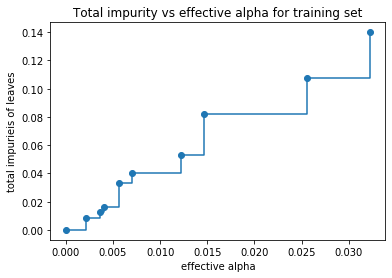

In [5]:
fig,ax=plt.subplots()
ax.plot(ccp_alphas[:-1],impurities[:-1],marker='o',drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurieis of leaves')
ax.set_title('Total impurity vs effective alpha for training set')

#last value in ccp_alphas prunes whole tree -> leaving a tree with only the root


In [6]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=40,ccp_alpha=ccp_alpha)
    clf.fit(X_train,Y_train)
    clfs.append(clf)

#We use tree_ attribute to access structure of the tree
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.33136134195474853


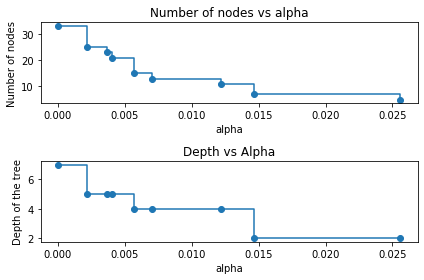

In [8]:
clfs=clfs[:-1]
ccp_alphas=ccp_alphas[:-1]
node_counts=[clf.tree_.node_count for clf in clfs]
depths=[clf.tree_.max_depth for clf in clfs]
fig,ax=plt.subplots(2,1)

ax[0].plot(ccp_alphas,node_counts,marker='o',drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('Number of nodes')
ax[0].set_title('Number of nodes vs alpha')
ax[1].plot(ccp_alphas,depths,marker='o',drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('Depth of the tree')
ax[1].set_title('Depth vs Alpha')
fig.tight_layout()

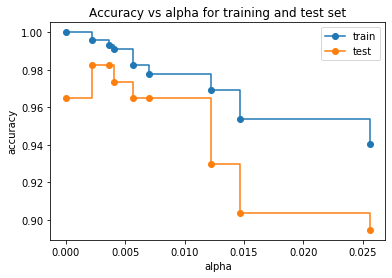

In [9]:
#Comparing training set and test set 
train_scores=[clf.score(X_train,Y_train) for clf in clfs]
test_scores=[clf.score(X_test,Y_test) for clf in clfs]
fig, ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and test set')
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

In [37]:
#Finding the best alpha with GridSearchCV
#fit and score method
params={'ccp_alpha':ccp_alphas}
clf=DecisionTreeClassifier()
grid_tree=GridSearchCV(clf,param_grid=params,cv=4,refit=True)
grid_tree.fit(X_train,Y_train)
print('best alpha:',grid_tree.best_params_)
print('best score:',grid_tree.best_score_)
final_tree=grid_tree.best_estimator_
#feature importance -> normalized total reduction of criteria
print(final_tree.feature_importances_)
Y_pred=final_tree.predict(X_test)
accuracy_score(Y_test,Y_pred)

best alpha: {'ccp_alpha': 0.007032967032967031}
best score: 0.9341328986182269
[0.         0.         0.         0.         0.         0.
 0.         0.02862141 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.03955987
 0.         0.         0.02834426 0.07483515 0.76922057 0.
 0.         0.         0.         0.05941875 0.         0.        ]


0.956140350877193

##### Visualizing Tree

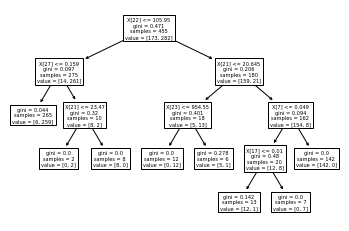

In [11]:
from sklearn import tree
tree.plot_tree(final_tree)
plt.show()

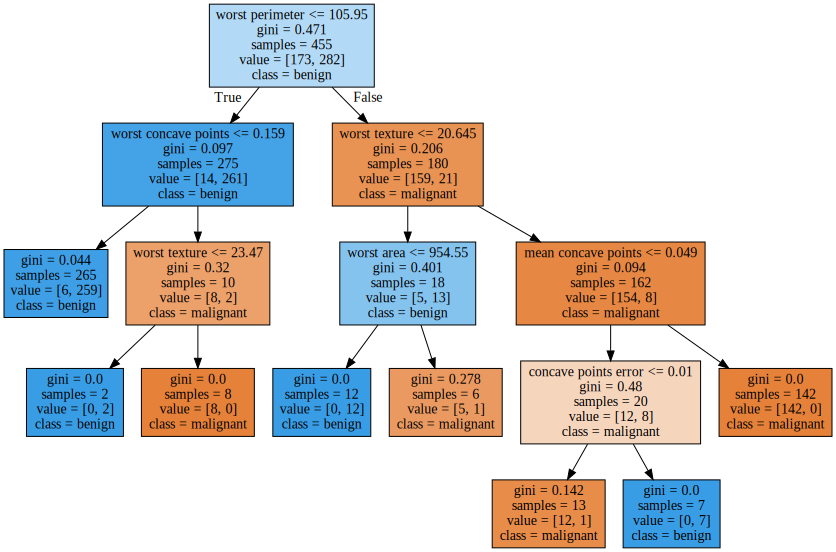

In [12]:
import graphviz
dot_data=tree.export_graphviz(final_tree,out_file=None,feature_names=feature_names,class_names=bc.target_names,filled=True,impurity=True)
graph=graphviz.Source(dot_data)
graph.render('Breast_Cancer')
graph

##### Ensemble learning

###### Bagging (Random Forests, etc.)

###### Boosting (AdaBoost, Gradient Boosting, and XGBoost)

In [22]:
#Bagging (Randomforest)
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(random_state=0,oob_score=True,verbose=1)
'''
parameters : n_estimators/criterion/max_features='sqrt'/
bootstrap=True/oob_score=False 
'''
forest.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=1,
                       warm_start=False)

In [33]:
print(forest.oob_score_)
print(forest.oob_decision_function_.shape)
#train sample size, the number of class
forest.oob_decision_function_[0:20,:]
#the classification rate of the oob samples
#by the estimators in which the samples are not included for training

0.9626373626373627
(455, 2)


array([[0.9       , 0.1       ],
       [0.03030303, 0.96969697],
       [0.        , 1.        ],
       [0.03571429, 0.96428571],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.5625    , 0.4375    ],
       [1.        , 0.        ],
       [0.02380952, 0.97619048],
       [0.03703704, 0.96296296],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.02272727, 0.97727273],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [39]:
#Feature importance by mean decrease in impurity
import time
start_time=time.time()
importances=forest.feature_importances_
std=np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
elapsed_time=time.time()-start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.135 seconds


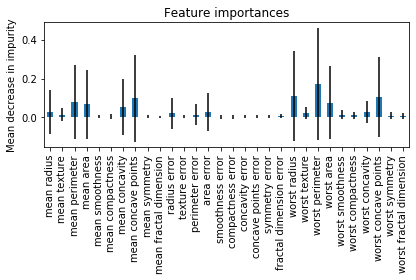

In [43]:
forest_importances=pd.Series(importances,index=feature_names)
fig,ax=plt.subplots()
forest_importances.plot.bar(yerr=std,ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [45]:
#Permutation feature importance
from sklearn.inspection import permutation_importance
start=time.time()
result=permutation_importance(forest,X_test,Y_test,n_repeats=10,random_state=42,n_jobs=2)
elapsed_time=time.time()-start
print(f"Elapsed time to compute the importances:{elapsed_time:.3f} seconds")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Elapsed time to compute the importances:6.914 seconds


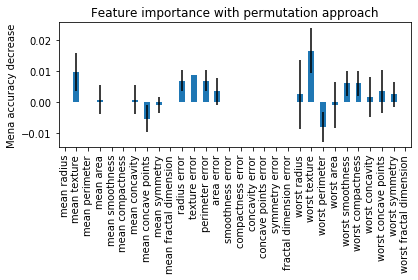

In [46]:
forest_importances=pd.Series(result.importances_mean,index=feature_names)
fig,ax=plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std,ax=ax)
ax.set_title('Feature importance with permutation approach')
ax.set_ylabel('Mena accuracy decrease')
fig.tight_layout()
plt.show()

In [47]:
#Boosting Adaboost classifier 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [56]:
adbc=AdaBoostClassifier(n_estimators=100).fit(X_train,Y_train) 
#Adaboost SAMME
#base_estimator: default is stump
print('Adaboost classification : '+str(adbc.score(X_test,Y_test)))

grbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3).fit(X_train,Y_train)
#default log loss
print('Gradient Boosting Classifier : '+str(grbc.score(X_test,Y_test)))

Adaboost classification : 0.9736842105263158
Gradient Boosting Classifier : 0.956140350877193


In [88]:
from sklearn.datasets import load_diabetes
X,Y=load_diabetes(return_X_y=True)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

0.3424514404614909
0.2561389367602226


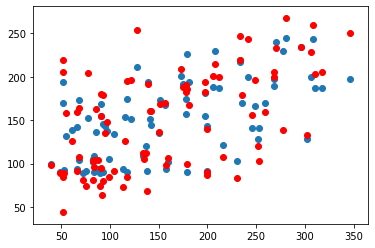

In [71]:
adbr=AdaBoostRegressor(n_estimators=100).fit(X_train,Y_train)
print(adbr.score(X_test,Y_test)) #R squared 
plt.scatter(Y_test,adbr.predict(X_test))

gdbr=GradientBoostingRegressor().fit(X_train,Y_train)
print(gdbr.score(X_test,Y_test))
plt.scatter(Y_test,gdbr.predict(X_test),color='red')

In [79]:
import xgboost as xgb
#min_child_weight, max_depth, gamma should be tuned
xgbc=xgb.XGBClassifier(n_estimators=100)
#learning rate eta default 0.1 min_child_weight: cover(sum of hessians)
#max depth, gamma (when gain<gamma no split)
#colsample_bytree : the ratio of feature sample for single tree
params={'max_depth':[5,6,7],'min_child_weight':[0,1,2,3],'gamma':[0,0.1,1]}
xggrid=GridSearchCV(xgbc,param_grid=params,cv=4)
xggrid.fit(X_train,Y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
           

In [87]:
print(xggrid.best_params_)
xggrid.best_estimator_.score(X_test,Y_test)

{'gamma': 0.1, 'max_depth': 6, 'min_child_weight': 0}


0.956140350877193

In [91]:
xgbr=xgb.XGBRegressor(n_estimators=100)
params={'max_depth':[5,6,7],'min_child_weight':[0,1,2,3],'gamma':[0,0.1,1]}
xggrid_r=GridSearchCV(xgbr,param_grid=params,cv=4)
xggrid_r.fit(X_train,Y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='reg:squarederror',
                                    predictor=None, random_state=None,
 

{'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 0}
0.10279708949610389


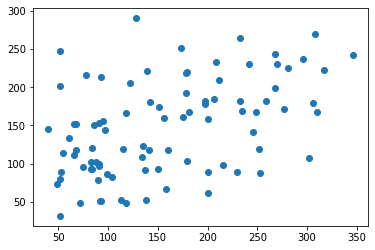

In [93]:
print(xggrid_r.best_params_)
print(xggrid_r.best_estimator_.score(X_test,Y_test))
plt.scatter(Y_test,xggrid_r.best_estimator_.predict(X_test))